In [1]:
###importing libraries to work with

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("flavors_of_cacao.csv")

In [0]:
###understanding the data. This comes with scrutinizing the data to see what it entails.

In [2]:
### This checks the first 10 rows of the dataset. This gives a brief overview of what to expect in the dataset. Also, it helps you check if the right datatset has been imported

df.head(10)

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


In [3]:
print("This is a short description of the dataset:\n")
    # Shape of the dataframe
print("Number of Instances:",df.shape[0])
print("Number of Features:",df.shape[1])

# Summary Statistics
print("\nSummary Stats:")
print(df.describe())

# Missing Value Inspection
print("\nMissing Values:")
print(df.isna().sum())


This is a short description of the dataset:

Number of Instances: 1795
Number of Features: 9

Summary Stats:
               REF  Review\nDate       Rating
count  1795.000000   1795.000000  1795.000000
mean   1035.904735   2012.325348     3.185933
std     552.886365      2.927210     0.478062
min       5.000000   2006.000000     1.000000
25%     576.000000   2010.000000     2.875000
50%    1069.000000   2013.000000     3.250000
75%    1502.000000   2015.000000     3.500000
max    1952.000000   2017.000000     5.000000

Missing Values:
Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64


In [4]:
# Cleaning attribute names

cols = list(df.columns)

### Function to replace newline characters and spaces in the attribute names
def rec_features(feature_names):
    rec_feat = []
    for f in feature_names:
        rec_feat.append(((f.casefold()).replace("\n","_")).replace(" ","_"))
    return rec_feat
print("Feature Names before Cleaning:")
print(cols)
print("\nFeature Names after Cleaning:")
print(rec_features(cols))



Feature Names before Cleaning:
['Company\xa0\n(Maker-if known)', 'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating', 'Bean\nType', 'Broad Bean\nOrigin']

Feature Names after Cleaning:
['company\xa0_(maker-if_known)', 'specific_bean_origin_or_bar_name', 'ref', 'review_date', 'cocoa_percent', 'company_location', 'rating', 'bean_type', 'broad_bean_origin']


In [5]:
##Function to change attribute name 'company\xa0_(maker-if_known)' to company
new_feature_names = rec_features(cols)
new_feature_names[0] = "company"

d_f=df.rename(columns=dict(zip(df.columns,new_feature_names)))
d_f.dtypes
d_f.head()
d_f.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   company                           1795 non-null   object 
 1   specific_bean_origin_or_bar_name  1795 non-null   object 
 2   ref                               1795 non-null   int64  
 3   review_date                       1795 non-null   int64  
 4   cocoa_percent                     1795 non-null   object 
 5   company_location                  1795 non-null   object 
 6   rating                            1795 non-null   float64
 7   bean_type                         1794 non-null   object 
 8   broad_bean_origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [6]:
#Null values found in bean_type and broad_bean_origin
#Finding out what the missing values are and where they are
print(d_f['bean_type'].value_counts().head())
print("Null values encrypted  as:")
list(d_f['bean_type'][0:10])

                        887
Trinitario              419
Criollo                 153
Forastero                87
Forastero (Nacional)     52
Name: bean_type, dtype: int64
Null values encrypted  as:


['\xa0',
 '\xa0',
 '\xa0',
 '\xa0',
 '\xa0',
 'Criollo',
 '\xa0',
 'Criollo',
 'Criollo',
 '\xa0']

In [7]:
d_f.isnull().sum()

company                             0
specific_bean_origin_or_bar_name    0
ref                                 0
review_date                         0
cocoa_percent                       0
company_location                    0
rating                              0
bean_type                           1
broad_bean_origin                   1
dtype: int64

In [8]:
d_f.head(2)

,company,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo


In [9]:
d_f['bean_type'].isnull()


0       False
1       False
2       False
3       False
4       False
        ...  
1790    False
1791    False
1792    False
1793    False
1794    False
Name: bean_type, Length: 1795, dtype: bool

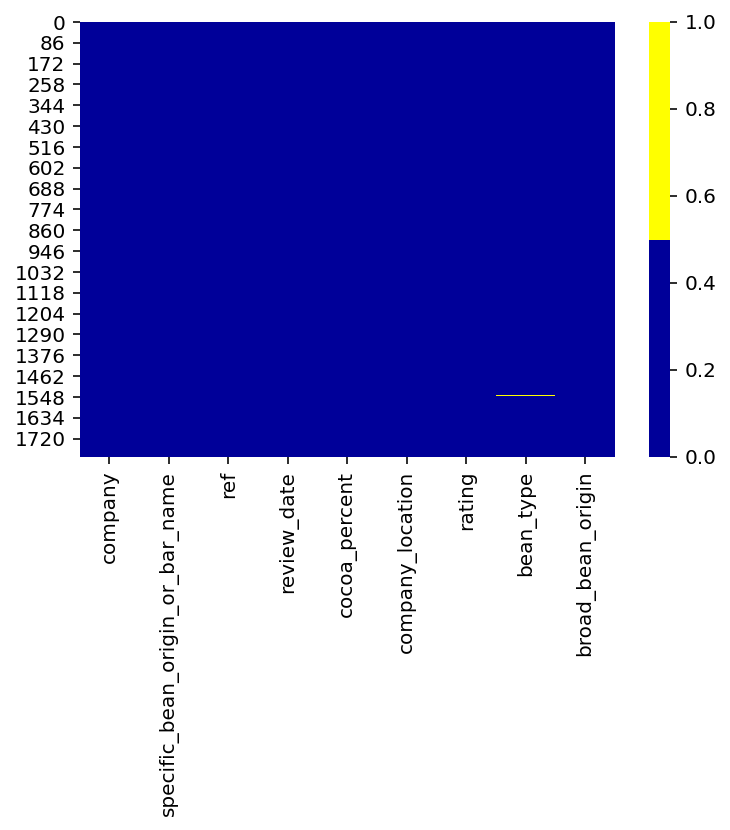

In [10]:
#a way of finding the missing values
cols = d_f.columns[:] # all columns
colours = ['#000099', '#ffff00'] 
# specifying the colours - yellow is missing. blue is not missing.
sns.heatmap(d_f[cols].isnull(), cmap=sns.color_palette(colours))

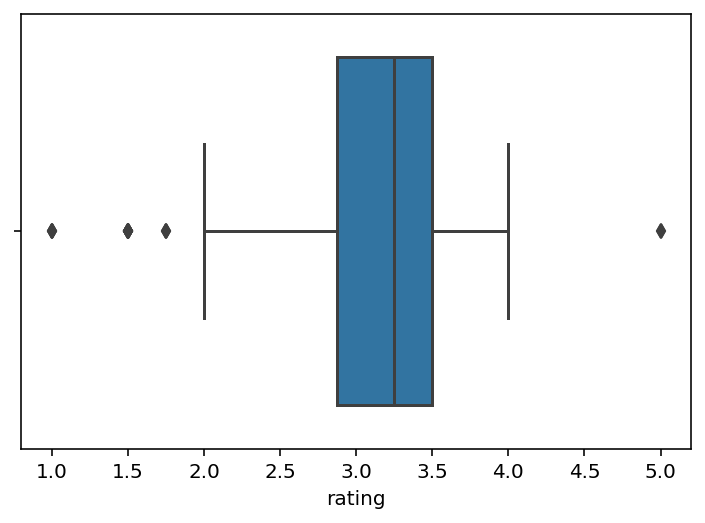

In [11]:
#finding outliers
sns.boxplot(x=d_f['rating'])

In [12]:
# to find all bean_type along with thier number of occurrence
d_f['bean_type'].value_counts()

                            887
Trinitario                  419
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
Nacional (Arriba)             3
Beniano                       3
Matina                        3
EET                           3
Criollo (Ocumare 61)          2
Criollo, Forastero            2
Trinitario (85% Criollo)      2
Amazon, ICS                   2
Trinitario, Forastero         2
Forastero (Catongo)           2
Amazon mix                    2
Criollo (Amarru)              2
Nacional                      2
Trinitario, TCGA              1
Criollo (Ocumare 77)          1
Criollo (Ocumare)             1
Trinitario (Amelonado)        1
Forastero, Trinitario         1
Criollo (Ocumare 67)          1
Amazon  

In [13]:
# to find all broad_bean_origin along with thier number of occurrence
d_f['broad_bean_origin'].value_counts()

Venezuela                  214
Ecuador                    193
Peru                       165
Madagascar                 145
Dominican Republic         141
                          ... 
Ven.,Ecu.,Peru,Nic.          1
Trinidad-Tobago              1
Madagascar & Ecuador         1
Ven., Indonesia, Ecuad.      1
Venezuela, Trinidad          1
Name: broad_bean_origin, Length: 100, dtype: int64

In [14]:
d_f.isnull().sum()

company                             0
specific_bean_origin_or_bar_name    0
ref                                 0
review_date                         0
cocoa_percent                       0
company_location                    0
rating                              0
bean_type                           1
broad_bean_origin                   1
dtype: int64

In [15]:
# Replace null cells with None 

#def replace_null(x):
   # if(x is "\xa0"):
      #  return "None"

# apply()        
#d_f['bean_type'] = d_f['bean_type'].apply(replace_null)
#d_f.head()



In [16]:
# Converting percentages(cocoa_percent) to decimals for easy mathematical operations

d_f['cocoa_percent']=d_f['cocoa_percent'].str.replace('%','').astype(float)/100
d_f.head()

,company,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru


In [17]:
#Deleting the column, ref
d_f.drop(["ref"], axis = 1, inplace = True)
d_f.head()

,company,specific_bean_origin_or_bar_name,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,2015,0.70,France,3.50,,Peru


In [18]:
#save clean dataframe as csv
d_f.to_csv('clean_chocolates.csv')

Fig 2: Count of Cocoa Percentage


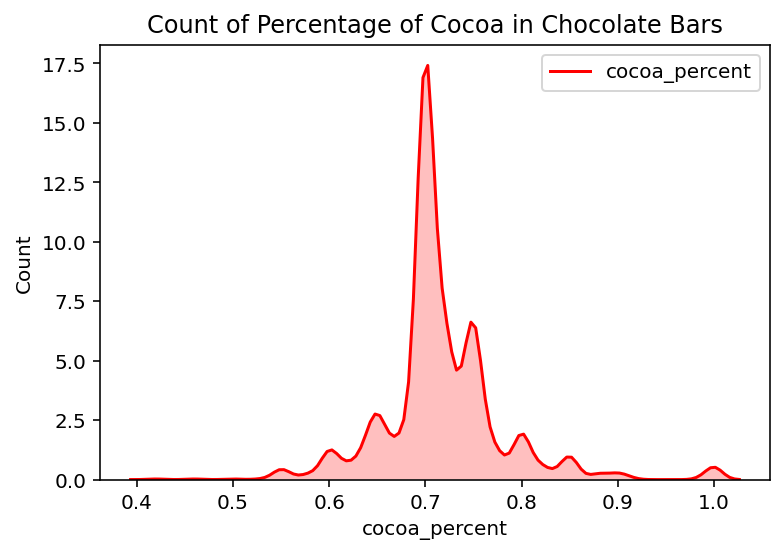

In [19]:
# plot to show count of percentage of cocoa in chocolate bars
sns.kdeplot(d_f['cocoa_percent'], legend=True, Color='Red', shade=True)
plt.xlabel('cocoa_percent')
plt.ylabel('Count')
plt.title('Count of Percentage of Cocoa in Chocolate Bars')
print('Fig 2: Count of Cocoa Percentage')

Fig 1: Count of Chocolate Bar Ratings


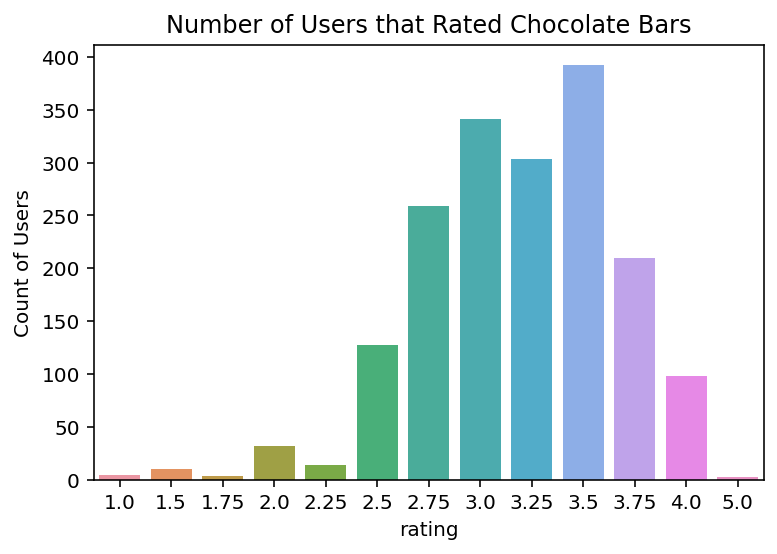

In [20]:
# plot to show the number of users that rated chocolate Bars
sns.countplot(x='rating', data=d_f)
plt.xlabel('rating')
plt.ylabel('Count of Users')
plt.title('Number of Users that Rated Chocolate Bars')
print('Fig 1: Count of Chocolate Bar Ratings')

In [21]:
#show the number of chocolate bars with 100 percent rating 
cocoa_one_hundred=d_f[d_f['cocoa_percent' ] == 1.0] 
cocoa_one_hundred.count()

company                             20
specific_bean_origin_or_bar_name    20
review_date                         20
cocoa_percent                       20
company_location                    20
rating                              20
bean_type                           20
broad_bean_origin                   20
dtype: int64

Fig 5: Ratings of Chocolate Bars with 100% Cocoa


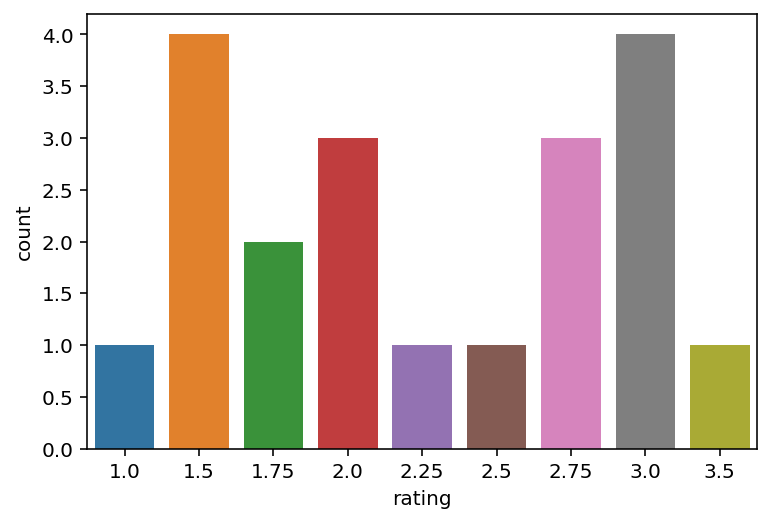

In [22]:
sns.countplot(x='rating', data=cocoa_one_hundred)
print("Fig 5: Ratings of Chocolate Bars with 100% Cocoa")

In [23]:
#show the number of chocolate bars with 70 percent rating
cocoa_seventy=d_f[d_f['cocoa_percent' ] == 0.7]
cocoa_seventy.count()

company                             672
specific_bean_origin_or_bar_name    672
review_date                         672
cocoa_percent                       672
company_location                    672
rating                              672
bean_type                           671
broad_bean_origin                   672
dtype: int64

Fig 6: Ratings of Chocolate Bars with 70% Cocoa


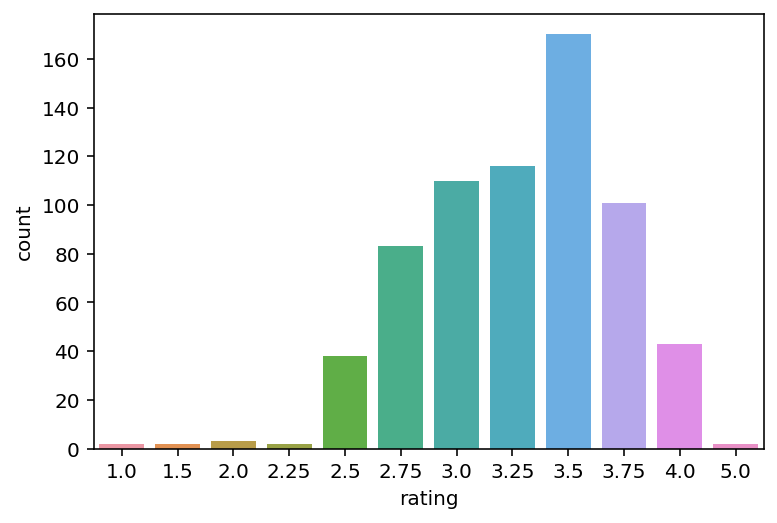

In [24]:
#plot to show the ratings of chocolate bars with 70% cocoa
sns.countplot(x='rating', data=cocoa_seventy)
print("Fig 6: Ratings of Chocolate Bars with 70% Cocoa")

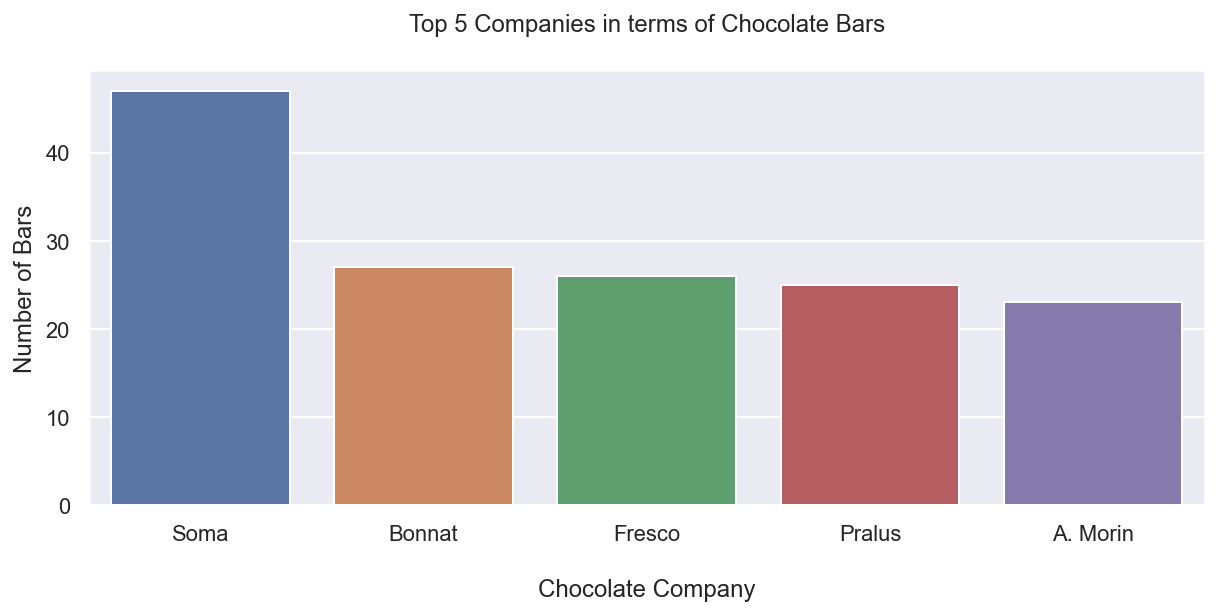

In [25]:
d = d_f['company'].value_counts().sort_values(ascending=False).head(5)
d = pd.DataFrame(d)
d = d.reset_index()  # dataframe with top 5 companies

# Plot to show the top 5 companies with the highest produce of chocolate bars
sns.set()
plt.figure(figsize=(10, 4))
sns.barplot(x='index', y='company', data=d)
plt.xlabel("\nChocolate Company")
plt.ylabel("Number of Bars")
plt.title("Top 5 Companies in terms of Chocolate Bars\n")
plt.show()

In [26]:
d_f['bean_type'].isnull().sum()

1

In [27]:
d_f['bean_type'].notnull().sum()

1794

In [28]:
# finding the percentage of all values in bean_type
counts = d_f['bean_type'].value_counts()
percent = d_f['bean_type'].value_counts(normalize=True)
percent100 = d_f['bean_type'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
,887,0.494426,49.4%
Trinitario,419,0.233556,23.4%
Criollo,153,0.085284,8.5%
Forastero,87,0.048495,4.8%
Forastero (Nacional),52,0.028986,2.9%
Blend,41,0.022854,2.3%
"Criollo, Trinitario",39,0.021739,2.2%
Forastero (Arriba),37,0.020624,2.1%
Criollo (Porcelana),10,0.005574,0.6%
"Trinitario, Criollo",9,0.005017,0.5%


In [38]:
# finding the percentage of all values in broad_bean_origin
counts = d_f['broad_bean_origin'].value_counts()
percent = d_f['broad_bean_origin'].value_counts(normalize=True)
percent100 = d_f['broad_bean_origin'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
Venezuela,214,0.119287,11.9%
Ecuador,193,0.107581,10.8%
Peru,165,0.091973,9.2%
Madagascar,145,0.080825,8.1%
Dominican Republic,141,0.078595,7.9%
...,...,...,...
"Ven.,Ecu.,Peru,Nic.",1,0.000557,0.1%
Trinidad-Tobago,1,0.000557,0.1%
Madagascar & Ecuador,1,0.000557,0.1%
"Ven., Indonesia, Ecuad.",1,0.000557,0.1%


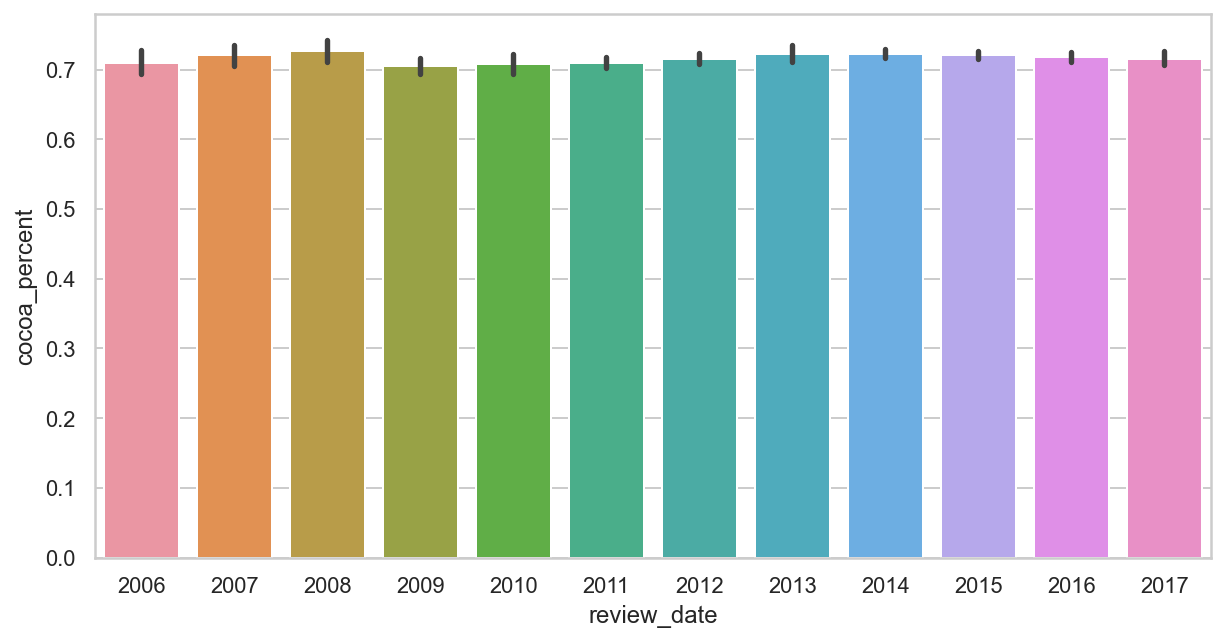

In [32]:
#plot to show Chocolate review date per cocoa percent
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.barplot(x='review_date', y='cocoa_percent', data=d_f)

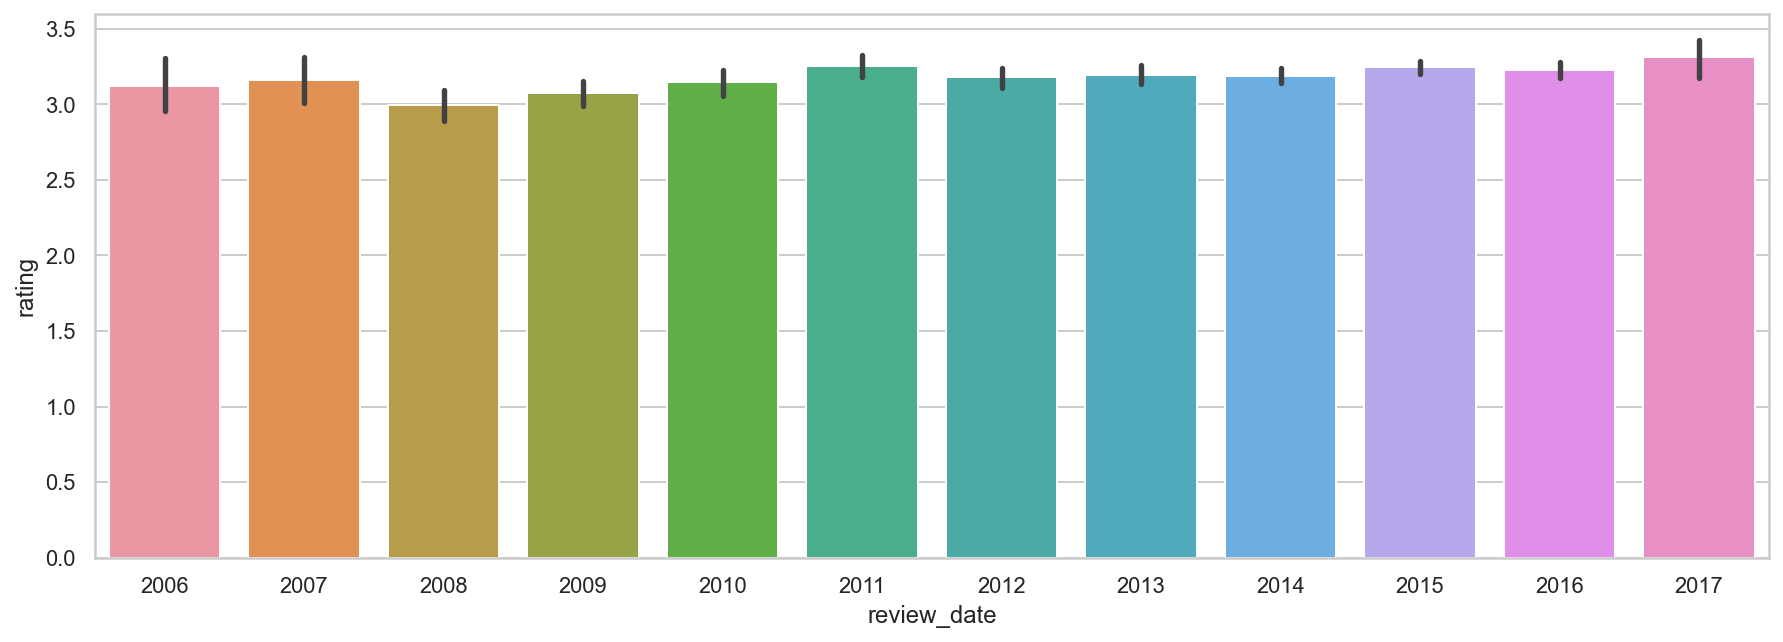

In [33]:
#plot to show Chocolate review date per rating

sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.barplot(x='review_date', y='rating', data=d_f)

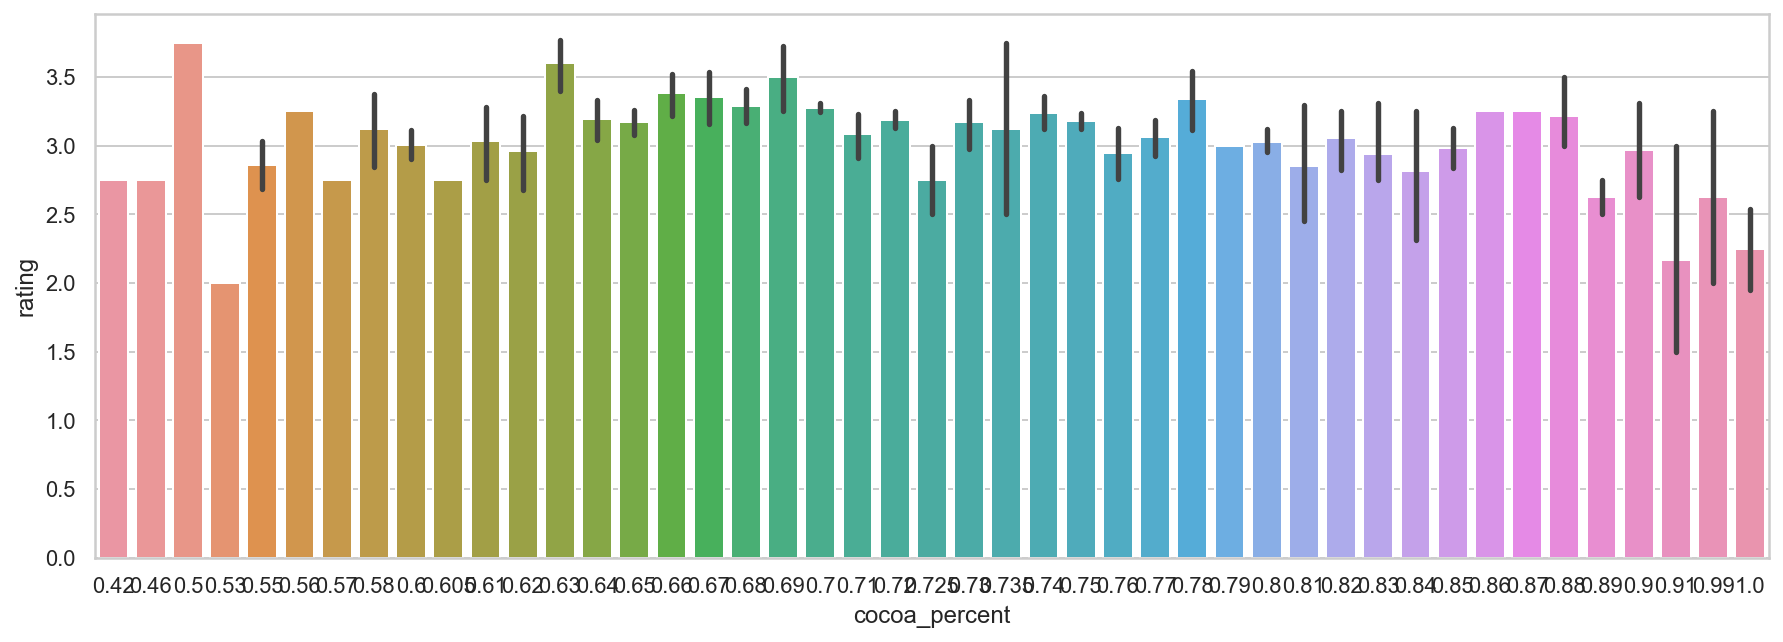

In [34]:
#plot to show Chocolate cocoa percent per rating
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.barplot(x='cocoa_percent', y='rating', data=d_f)

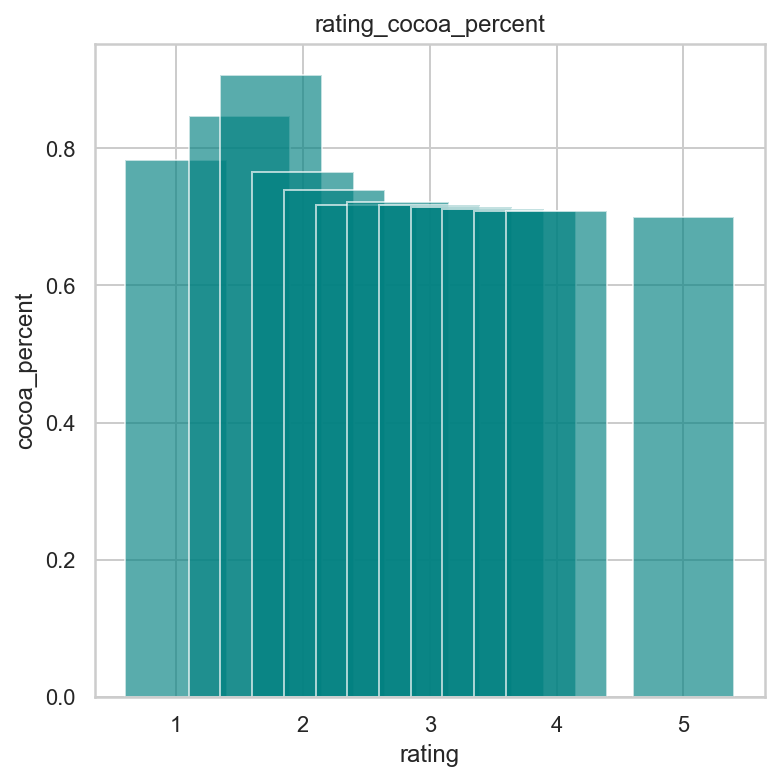

In [38]:
plt.figure(figsize=(6,6))
plt.bar(d_f.groupby('rating')['rating'].count().index,d_f.groupby('rating')['cocoa_percent'].mean(), color ='teal',alpha=0.65)
plt.xlabel("rating",fontsize=12)
plt.ylabel("cocoa_percent",fontsize=12)
plt.title("rating_cocoa_percent")
plt.show()

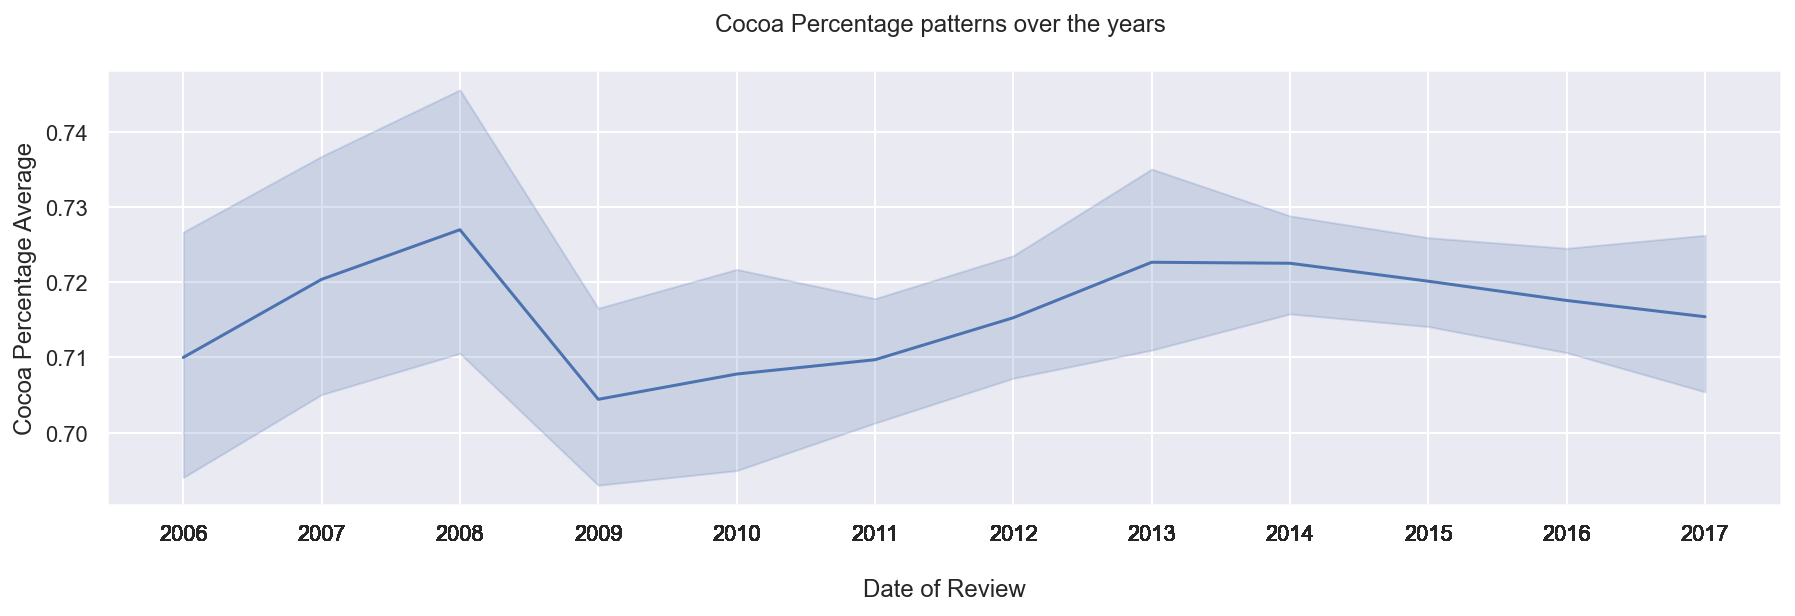

In [39]:
### Pattern of cocoa usage over the years.

cp = d_f.groupby('review_date').aggregate({'cocoa_percent':'mean'})
cp = d_f.reset_index()

# Plotting
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='review_date', y='cocoa_percent', data=d_f)
ax.set(xticks=d_f.review_date.values)
plt.xlabel("\nDate of Review")
plt.ylabel("Cocoa Percentage Average")
plt.title("Cocoa Percentage patterns over the years \n")
plt.show()

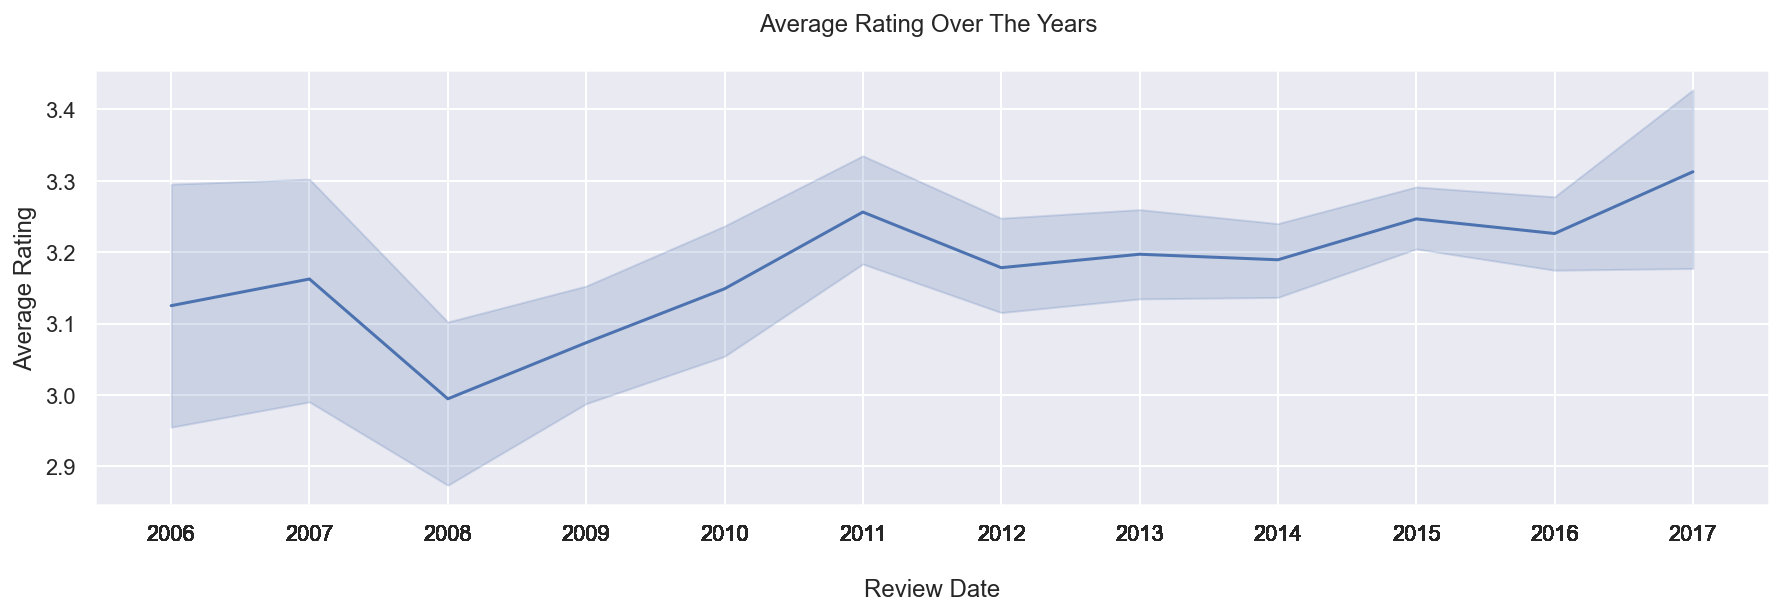

In [40]:
### Pattern of ratings over the years

rp = d_f.groupby('review_date').aggregate({'rating':'mean'})
rp = rp.reset_index()

# Plotting
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='review_date', y='rating', data=d_f)
ax.set(xticks=d_f.review_date.values)
plt.xlabel("\nReview Date")
plt.ylabel("Average Rating")
plt.title("Average Rating Over The Years \n")
plt.show()

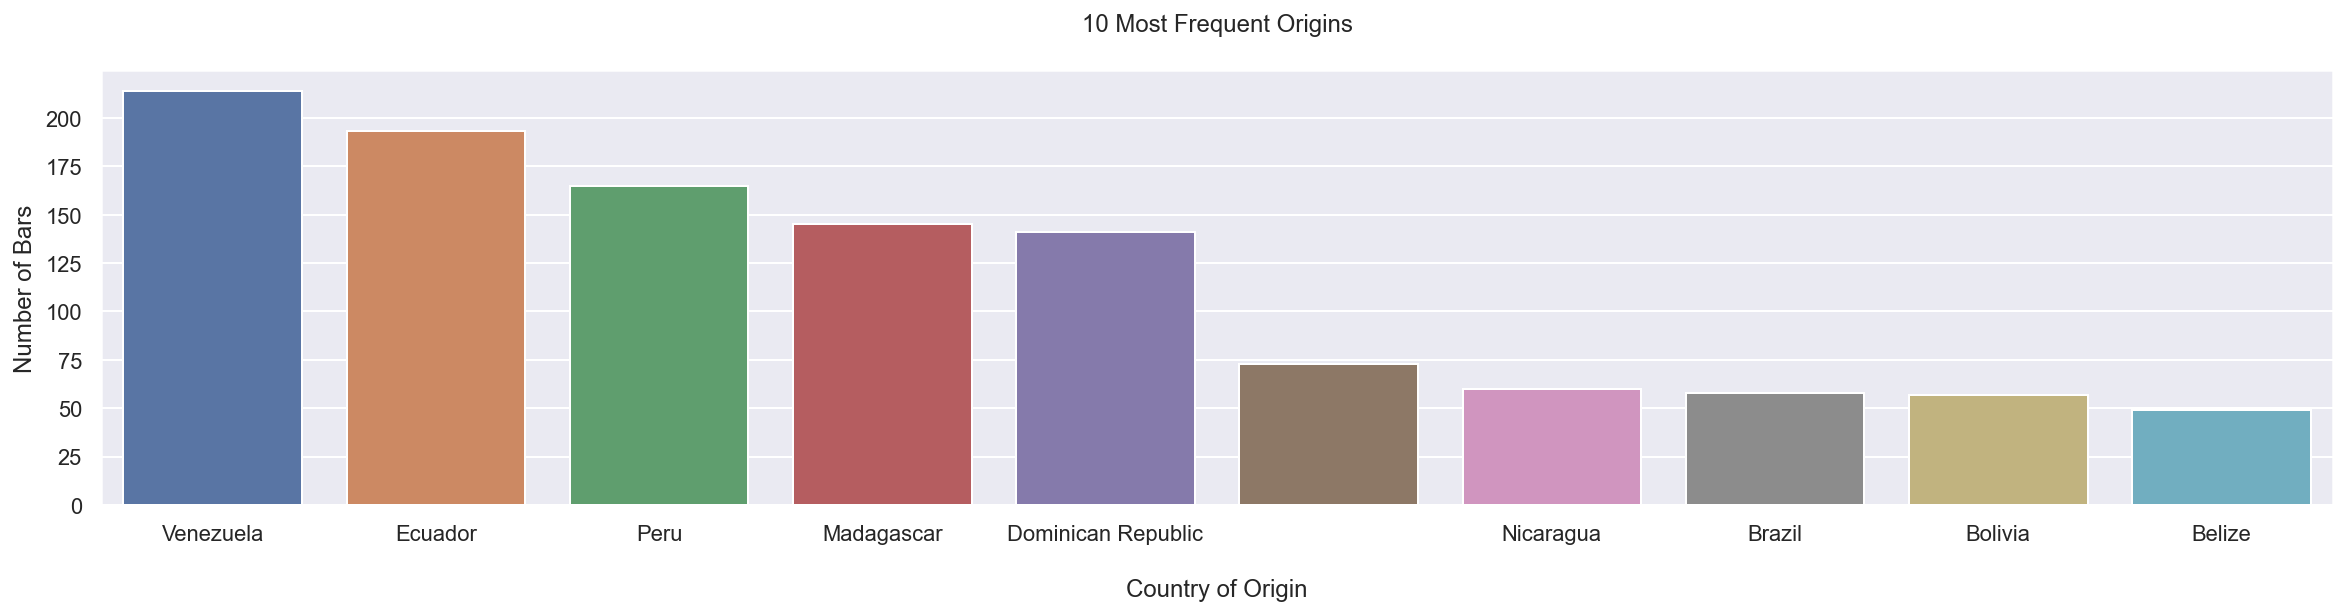

In [41]:
cr = d_f['broad_bean_origin'].value_counts().sort_values(ascending=False).head(10)
cr = pd.DataFrame(cr)
cr= cr.reset_index() # dataframe with top 10 countries(most frequent countries)

# Plot to show 10 most frequent origins
sns.set()
plt.figure(figsize=(20,4))
sns.barplot(x='index', y='broad_bean_origin', data=cr)
plt.xlabel("\nCountry of Origin")
plt.ylabel("Number of Bars")
plt.title("10 Most Frequent Origins\n")
plt.show()